In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df_treinamento = pd.read_csv('../arquivos_csv/treinamento5.csv', low_memory=False)
df_teste = pd.read_csv('../arquivos_csv/teste5.csv', low_memory=False)

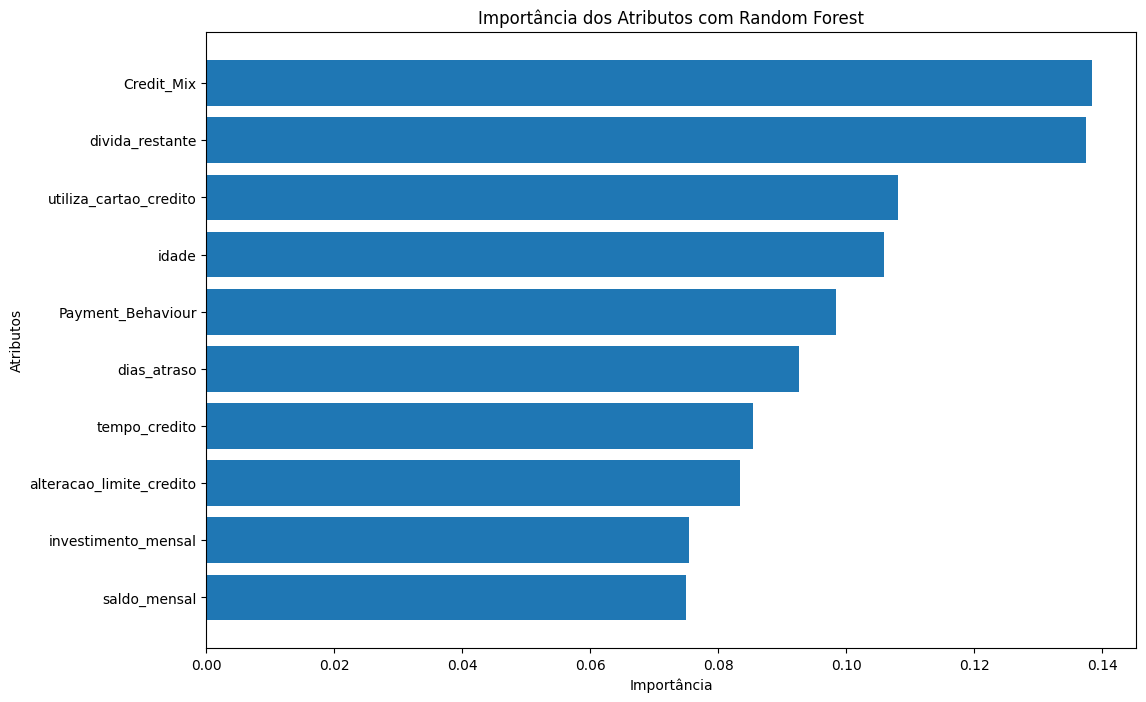

Atributos selecionados: []


In [2]:
X_train = df_treinamento.drop(columns=['Credit_Score'])  # Remova a coluna alvo
y_train = df_treinamento['Credit_Score']  # Defina a coluna alvo

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Obter a importância dos atributos
importancias = modelo_rf.feature_importances_
atributos = X_train.columns

importancias_df = pd.DataFrame({'Atributo': atributos, 'Importancia': importancias})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Plotar a importância dos atributos
plt.figure(figsize=(12, 8))
plt.barh(importancias_df['Atributo'], importancias_df['Importancia'])
plt.xlabel('Importância')
plt.ylabel('Atributos')
plt.title('Importância dos Atributos com Random Forest')
plt.gca().invert_yaxis()
plt.show()

threshold = 1  # Ajuste conforme necessário
atributos_importantes = importancias_df[importancias_df['Importancia'] > threshold]['Atributo'].tolist()

# Criar datasets reduzidos com os atributos selecionados
X_treinamento_reduzido = X_train[atributos_importantes]
X_teste_reduzido = df_teste[atributos_importantes]  # Aplicar no dataset de teste também

print("Atributos selecionados:", atributos_importantes)

### Remoção de novos atributos

In [6]:
# Lista dos atributos a serem removidos
atributos_para_remover = [
    "Payment_of_Min_Amount", "Not_Specified", "Payday_Loan", "Mortgage_Loan",
    "Debt_Consolidation_Loan", "Home_Equity_Loan", "Personal_Loan",
    "Student_Loan", "Auto_Loan", "Credit-Builder_Loan"
]

# Remover os atributos do DataFrame de treinamento
df_treinamento = df_treinamento.drop(columns=atributos_para_remover, errors='ignore')

# Remover os atributos do DataFrame de teste
df_teste = df_teste.drop(columns=atributos_para_remover, errors='ignore')


# Salvando Dados

In [4]:

df_treinamento.to_csv('../arquivos_csv/treinamento5.csv', index=False)
df_teste.to_csv('../arquivos_csv/teste5.csv', index=False)